In [1]:
import pandas as pd
import numpy as np

In [2]:
import mnist
from tensorflow import keras

In [3]:
from tensorflow.keras.layers import Dense, Dropout, Flatten

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical

In [5]:
import os

In [6]:
import cv2

# 데이터 불러오기

In [7]:
# 파일에 있는 이미지 불러오기
train_Dir ="./genderImg/gender/"
train_folder_list = np.array(os.listdir(train_Dir))
train_folder_list

img_size = 48
train_images = []
train_labels = []
test_images = []
test_labels = []
for index in range(0,len(train_folder_list)):
    count = 0
    path = os.path.join(train_Dir, train_folder_list[index])
    path = path + "/"
    img_list = os.listdir(path)
    print(len(img_list)) #0번 dir갯수와 1번 dir갯수

    for img in img_list :
        img_path = os.path.join(path, img)
        try : 
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            new_img = cv2.resize(img,(img_size, img_size))
            if(count<=int(len(img_list)*0.8)):
                train_images.append(new_img)
                train_labels.append(index)
            else:
                test_images.append(new_img)
                test_labels.append(index)
            count = count+1
        except :
            pass

12391
11317


In [8]:
print(len(train_images))
print(len(train_labels))
print(len(test_images))
print(len(test_labels))

18967
18967
4741
4741


In [9]:
# 이미지 정규화
for i in range(0,len(train_images)):
    train_images[i] = (train_images[i]/255)
for i in range(0,len(test_images)):
    test_images[i] = (test_images[i]/255)

In [10]:
train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)

# 모델생성

In [11]:
# input layer를 위한 설정
inputShape = train_images[0].shape
inputShape

(48, 48)

In [12]:
# output layer를 위한 설정
nCalss = len(np.unique(train_labels))
nCalss

2

In [13]:
model = Sequential()
# input layer
model.add(Flatten(input_shape = inputShape))
# hidden layer
model.add(Dense(units=16, activation="relu"))
model.add(Dense(units=16, activation="relu"))
# output layer
model.add(Dense(units=nCalss, activation="softmax"))

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 2304)              0         
                                                                 
 dense (Dense)               (None, 16)                36880     
                                                                 
 dense_1 (Dense)             (None, 16)                272       
                                                                 
 dense_2 (Dense)             (None, 2)                 34        
                                                                 
Total params: 37,186
Trainable params: 37,186
Non-trainable params: 0
_________________________________________________________________


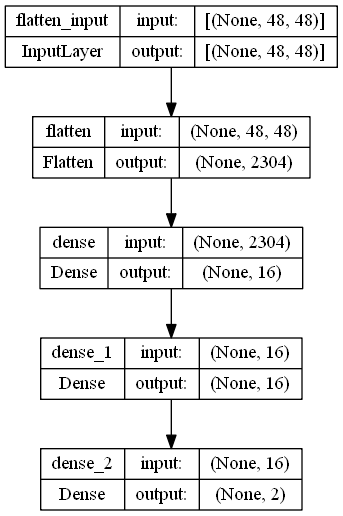

In [15]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file = "model_plot.png",
           show_shapes=True,
           show_layer_names = True)

# 모델 컴파일

In [16]:
from tensorflow.keras import optimizers
from tensorflow.keras import losses
from tensorflow.keras import metrics

In [17]:
model.compile(loss = "categorical_crossentropy",
             optimizer = "adam",
             metrics = ["accuracy"])

In [18]:
train_images = np.asarray(train_images)
test_images = np.asarray(test_images)

In [19]:
history = model.fit(x = train_images,
                    y = train_labels_one_hot,
                    epochs = 10,
                    batch_size = 32,
                    validation_split = 0.2)

Epoch 1/10
475/475 [==============================] - 2s 4ms/step - loss: 0.4686 - accuracy: 0.7860 - val_loss: 0.7921 - val_accuracy: 0.5556
Epoch 2/10
475/475 [==============================] - 1s 2ms/step - loss: 0.3693 - accuracy: 0.8400 - val_loss: 0.4393 - val_accuracy: 0.7797
Epoch 3/10
475/475 [==============================] - 1s 2ms/step - loss: 0.3526 - accuracy: 0.8482 - val_loss: 0.6311 - val_accuracy: 0.6112
Epoch 4/10
475/475 [==============================] - 1s 2ms/step - loss: 0.3353 - accuracy: 0.8555 - val_loss: 0.4302 - val_accuracy: 0.7973
Epoch 5/10
475/475 [==============================] - 1s 2ms/step - loss: 0.3247 - accuracy: 0.8586 - val_loss: 0.4944 - val_accuracy: 0.7459
Epoch 6/10
475/475 [==============================] - 1s 2ms/step - loss: 0.3115 - accuracy: 0.8609 - val_loss: 0.5991 - val_accuracy: 0.7024
Epoch 7/10
475/475 [==============================] - 1s 2ms/step - loss: 0.3100 - accuracy: 0.8627 - val_loss: 0.4474 - val_accuracy: 0.7873
Epoch 

### C-1. 모델 추론

In [20]:
model.evaluate(test_images, test_labels_one_hot)

149/149 [==============================] - 0s 1ms/step - loss: 1.0200 - accuracy: 0.6395


[1.0200238227844238, 0.6395274996757507]

### 에측

In [21]:
test_images.shape

(4741, 48, 48)

In [22]:
# 카톡에서 다운받아서 할것
testImg = cv2.imread("./52_0_4_20170104212316604.jpg.chip.jpg", cv2.IMREAD_GRAYSCALE)

In [23]:
type(testImg)

numpy.ndarray

In [24]:
testImg.shape

(200, 200)

In [25]:
import matplotlib.pyplot as plt

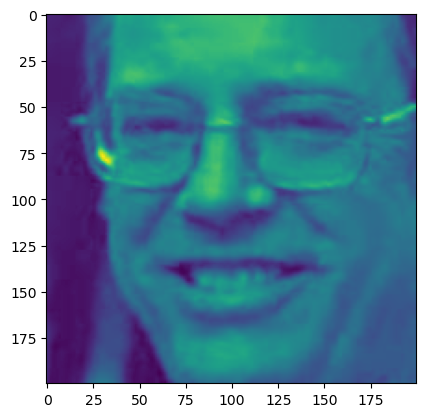

In [26]:
plt.imshow(testImg)

In [27]:
testImg.shape

(200, 200)

In [28]:
testImg = testImg.astype(float)

In [29]:
testImg = testImg/255.0

In [30]:
# 이미지 사이즈 변경
# testImg = testImg.resize((img_size,img_size)) 이 경우 from PIL import Image을 선언해야함
testImg = cv2.resize(testImg, (img_size, img_size))
# testImg = cv2.resize(testImg, dsize=(img_size,img_size))

In [31]:
testImg.shape

(48, 48)

In [32]:
testImg = testImg.reshape(1,img_size,img_size)

In [33]:
answer = model.predict(testImg)

1/1 [==============================] - 0s 101ms/step


In [34]:
result = np.argmax(answer)

In [35]:
result

0